<a href="https://colab.research.google.com/github/PerformanceGenetics/velox/blob/dev/Cardio_Video_Embeddings_Karim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/freelance/heart_classification_unsupervised_learning

/content/drive/MyDrive/freelance/heart_classification_unsupervised_learning


In [ ]:
pip install ffmpeg-python

In [ ]:
from pathlib import Path
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import subprocess
import shutil
%pwd

'/content'

# Creat Training Data

In [ ]:
!git clone https://github.com/antoine77340/video_feature_extractor

Cloning into 'video_feature_extractor'...
remote: Enumerating objects: 101, done.
remote: Total 101 (delta 0), reused 0 (delta 0), pack-reused 101
Receiving objects: 100% (101/101), 163.69 KiB | 5.11 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [ ]:
%cd video_feature_extractor

/content/drive/MyDrive/freelance/heart_classification_unsupervised_learning/video_feature_extractor


In [ ]:
features_folder = Path('./features')
features_folder.mkdir(exist_ok=True)
data = []


In [ ]:
folder = Path('../AllVideos/')
files = sorted(folder.glob('*'), key=lambda x: x.name)
len(files)

5508

In [ ]:
for v in files:
    npy_file = features_folder / v.with_suffix('.npy').name
    data.append([str(v),  str(npy_file)])


df = pd.DataFrame(data, columns=['video_path', 'feature_path'])
df.to_csv('videos_npy.csv', index=False)


In [ ]:
!python extract.py --csv=videos_npy.csv --type=2d --batch_size=64 --num_decoding_thread=8

In [ ]:
len(list(features_folder.glob('*')))

5505

In [ ]:
%pwd

'/content/drive/MyDrive/freelance/heart_classification_unsupervised_learning/video_feature_extractor'

In [ ]:
numpy_arr = []
all_numpy_files = sorted(features_folder.glob('*'), 
                         key=lambda f: f.name)

for npy_file in tqdm(all_numpy_files):
    arr = np.load(npy_file)
    h, w = arr.shape
    if h*w != 10*2048:
        continue

    numpy_arr.append(arr)


numpy_arr = np.array(numpy_arr, dtype=float)
numpy_arr.shape


  0%|          | 0/5505 [00:00<?, ?it/s]

(5476, 10, 2048)

In [ ]:
with open('all_data.npy', 'wb') as fp:
    np.save(fp, numpy_arr)

# Start Training K-Means

In [ ]:
data = np.load('./all_data.npy').reshape((-1, 20480))
data.shape

(5476, 20480)

  0%|          | 0/50 [00:00<?, ?it/s]

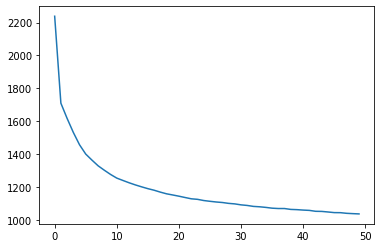

In [ ]:
errors = []
for i in tqdm(range(1,51)):
    model = KMeans(n_clusters=i, init='k-means++')
    model.fit(data)
    errors.append(model.inertia_)

plt.plot(errors);

In [ ]:
!rm -r ./features

# K-Means with 10 Clusters ==> 1275.99 inertia_
# K-Means with 20 Clusters ==> 1149.59 inertia_

In [ ]:
trained_model.inertia_

1275.9998740260735

In [ ]:
from sklearn.cluster import KMeans

trained_model = KMeans(10, verbose=1)
trained_model.fit(data)

Initialization complete
Iteration 0, inertia 2213.1335391104567
Iteration 1, inertia 1337.3353447723412
Iteration 2, inertia 1313.6017361442814
Iteration 3, inertia 1307.5201724889237
Iteration 4, inertia 1304.6417712051075
Iteration 5, inertia 1301.982052962317
Iteration 6, inertia 1299.4822738787793
Iteration 7, inertia 1297.2845928999752
Iteration 8, inertia 1295.3249021995575
Iteration 9, inertia 1293.8962045019377
Iteration 10, inertia 1292.490207177053
Iteration 11, inertia 1291.4584645291084
Iteration 12, inertia 1290.9043187630764
Iteration 13, inertia 1290.1868371870723
Iteration 14, inertia 1289.5886617264937
Iteration 15, inertia 1289.0006912911722
Iteration 16, inertia 1288.8408808243362
Iteration 17, inertia 1288.7986322321606
Iteration 18, inertia 1288.7530784857336
Iteration 19, inertia 1288.717437958824
Iteration 20, inertia 1288.69527452846
Iteration 21, inertia 1288.677384083736
Iteration 22, inertia 1288.6526711018
Iteration 23, inertia 1288.6266120637733
Iteration 2

KMeans(n_clusters=10, verbose=1)

In [ ]:
predicted = trained_model.predict(data)


In [ ]:
import random
all_available_plt_colors = range(31)
colors = random.sample(all_available_plt_colors, 
                       trained_model.n_clusters)


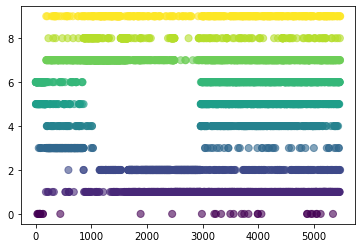

In [ ]:
plt.scatter(range(data.shape[0]), predicted, c=predicted, alpha=0.6, s=50)


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2).fit(data)
pca_2d = pca.transform(data)

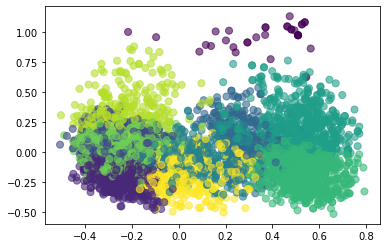

In [ ]:
X = pca_2d[:,0]
Y = pca_2d[:,1]
plt.scatter(X, Y, c=predicted, alpha=0.6, s=50)


In [ ]:
trained_model.n_clusters

10

In [ ]:
with open("k-means_10_clusters.pkl", "wb") as f:
    pickle.dump(trained_model, f)

# Loading Trained Model

In [ ]:
%cd video_feature_extractor/

/content/drive/MyDrive/freelance/heart_classification_unsupervised_learning/video_feature_extractor


In [ ]:
with open("k-means_10_clusters.pkl", "rb") as f:
  trained_model = pickle.load(f)


# Find Distance Between Centroids

In [ ]:
pip install annoy

     |████████████████████████████████| 646 kB 12.2 MB/s 
  Created wheel for annoy: filename=annoy-1.17.0-cp37-cp37m-linux_x86_64.whl size=391645 sha256=e49982756b9efc9c0d66dd621f502d7ea2d947dd2a10482731815f93e2466ea8
  Stored in directory: /root/.cache/pip/wheels/4f/e8/1e/7cc9ebbfa87a3b9f8ba79408d4d31831d67eea918b679a4c07
Successfully built annoy


In [ ]:
centroids  = trained_model.cluster_centers_  #means of shape [10,] 
centroids.shape

(10, 20480)

In [ ]:
from annoy import AnnoyIndex
import random

f = 10*2048
metric = 'angular' # gives floating point numbers for distances
# metric = 'manhattan' # give big numbers for distances
# metric = 'hamming'  # give zeros for all distances
# metric = 'dot'  # give big numbers for distances and not working properly

# give floating point numbers for distances 
# BUT bigger compared to angular distances
# metric = 'euclidean'  


annoy_search = AnnoyIndex(f, metric)  # Length of item vector that will be indexed
for i, center in enumerate(centroids):
    annoy_search.add_item(i, center)

annoy_search.build(10)  # 10 trees

# -----------------------------
# Save And Load Annoy
# -----------------------------
# t.save('test.ann')
# u = AnnoyIndex(f, metric)
# u.load('test.ann')  # super fast, will just mmap the file


True

In [ ]:
annoy_data = []
for i in range(len(centroids)):
    row = []
    for j in range(len(centroids)):
        dist = annoy_search.get_distance(i,j)
        row.append(dist)
        # similarity = round((1-dist)*100, 2)
        # row.append(similarity)
    
    annoy_data.append(row)

annoy_data


[[0.0,
  0.4895640015602112,
  0.45653262734413147,
  0.42865073680877686,
  0.44539502263069153,
  0.3575027585029602,
  0.47035515308380127,
  0.465510755777359,
  0.39288997650146484,
  0.47226130962371826],
 [0.4895640015602112,
  0.0,
  0.10650991648435593,
  0.22989194095134735,
  0.17292237281799316,
  0.2923794984817505,
  0.26423463225364685,
  0.11522173136472702,
  0.19566600024700165,
  0.12532931566238403],
 [0.45653262734413147,
  0.10650991648435593,
  0.0,
  0.2115822732448578,
  0.1879531443119049,
  0.27297914028167725,
  0.2740384638309479,
  0.10449071228504181,
  0.14768639206886292,
  0.15079978108406067],
 [0.42865073680877686,
  0.22989194095134735,
  0.2115822732448578,
  0.0,
  0.1415223330259323,
  0.1642729789018631,
  0.16102537512779236,
  0.20710021257400513,
  0.2316262274980545,
  0.19005464017391205],
 [0.44539502263069153,
  0.17292237281799316,
  0.1879531443119049,
  0.1415223330259323,
  0.0,
  0.20954462885856628,
  0.18778099119663239,
  0.158437

In [ ]:
annoy_df = pd.DataFrame(annoy_data)

annoy_df

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.489564,0.456533,0.428651,0.445395,0.357503,0.470355,0.465511,0.392890,0.472261
1,0.489564,0.000000,0.106510,0.229892,0.172922,0.292379,0.264235,0.115222,0.195666,0.125329
2,0.456533,0.106510,0.000000,0.211582,0.187953,0.272979,0.274038,0.104491,0.147686,0.150800
3,0.428651,0.229892,0.211582,0.000000,0.141522,0.164273,0.161025,0.207100,0.231626,0.190055
4,0.445395,0.172922,0.187953,0.141522,0.000000,0.209545,0.187781,0.158437,0.210785,0.150956
5,0.357503,0.292379,0.272979,0.164273,0.209545,0.000000,0.154051,0.264861,0.252658,0.222145
6,0.470355,0.264235,0.274038,0.161025,0.187781,0.154051,0.000000,0.260678,0.308515,0.181401
7,0.465511,0.115222,0.104491,0.207100,0.158437,0.264861,0.260678,0.000000,0.128139,0.123786
8,0.392890,0.195666,0.147686,0.231626,0.210785,0.252658,0.308515,0.128139,0.000000,0.203779
9,0.472261,0.125329,0.150800,0.190055,0.150956,0.222145,0.181401,0.123786,0.203779,0.000000


# Counting Number of videos per cluster

In [ ]:
from collections import Counter, defaultdict
num_items_in_cluster = Counter(trained_model.labels_)
num_items_in_cluster

Counter({0: 33,
         1: 700,
         2: 1104,
         3: 446,
         4: 277,
         5: 459,
         6: 691,
         7: 1088,
         8: 298,
         9: 380})

In [ ]:
# This should print 5476 which is the total number of valid videos in the dataset
sum(num_items_in_cluster.values()) 

5476

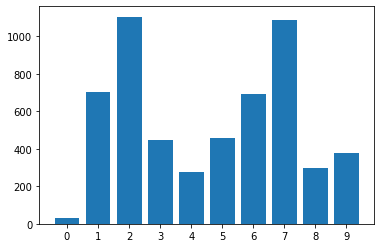

In [ ]:
X = list(num_items_in_cluster.keys())
Y = list(num_items_in_cluster.values())

plt.bar(X, Y, align='center')
plt.xticks(X)
plt.show()

# Assign a new video to a cluster

In [ ]:
def get_video_features(video_path, data_type='2d', batch_size=64, num_decoding_thread=8):

  # create a pathlib path
  if isinstance(video_path, str):
    video_path = Path(video_path)
  
  assert video_path.exists(), "Video Path Doesn't Exist"

  temp_folder = Path('./temp_folder')
  temp_folder.mkdir(exist_ok=True)
  
  npy_file = temp_folder / video_path.with_suffix('.npy').name
  data = [[str(video_path),  str(npy_file)]]
  df = pd.DataFrame(data, columns=['video_path', 'feature_path'])

  csv_file_path = temp_folder / 'videos_npy.csv'
  df.to_csv(csv_file_path, index=False)
  
  print('[INFO]: Extracting Video Features...')
  
  cmd = 'python extract.py --csv={} --type={} --batch_size={} --num_decoding_thread={}'.format(
        str(csv_file_path),
        data_type,
        batch_size,
        num_decoding_thread,
    )

  osstdout = subprocess.Popen(
        cmd,
        shell=True,
        stdin=subprocess.PIPE,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        close_fds=True,
    )
  
  theInfo = osstdout.communicate()[0].strip()  # excute the CMD command

  if osstdout.returncode == 0:
      print("[INFO]: Successfully Extracted Video Features.")
  else:
      print("[ERROR]: Falied To Extract Video Features.")
      print(theInfo)
  
  features = np.load(npy_file).reshape((1, 20480))
  shutil.rmtree(temp_folder)
  return features


In [ ]:
video_path = '../AllVideos/2016Russiancaravan.mp4'
video_fets = get_video_features(video_path)

cluster_idx = trained_model.predict(video_fets)[0]
print(f'This Video belongs to cluster # {cluster_idx}'.title())

NameError: ignored